In [4]:
import pandas as pd
reviews = pd.read_csv("winemag-data_first150k.csv", index_col=0)
import seaborn as sns
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


# Countplot

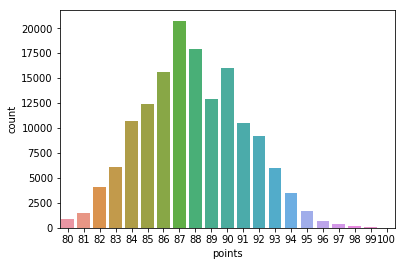

In [3]:
sns.countplot(reviews['points']);

seaborn doesn't have a direct analogue to the line or area chart. Instead, the package provides a kdeplot

# KDE(kernel density estimate) Plot

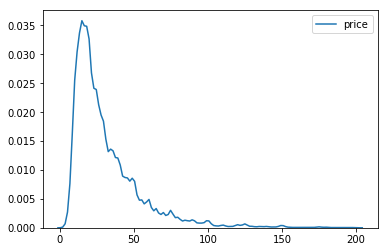

In [5]:
sns.kdeplot(reviews.query('price < 200').price);

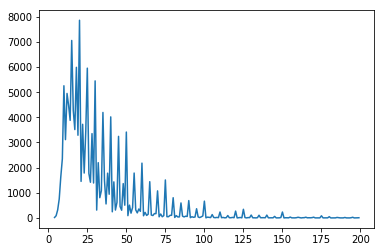

In [7]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


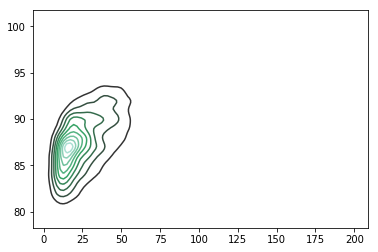

In [8]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

# Distplot
The seaborn equivalent to a pandas histogram is the distplot. Here's an example:

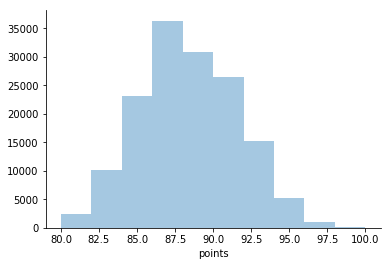

In [13]:
sns.distplot(reviews['points'], bins=10, kde=False);
sns.despine()

# Scatterplot and hexplot

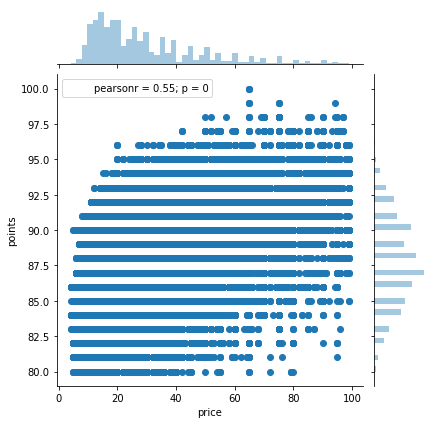

In [14]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100]);

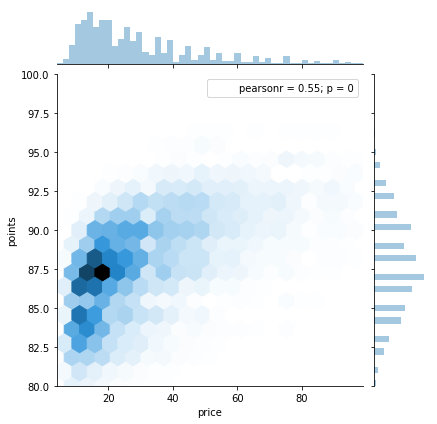

In [16]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20);

# Boxplot and violin plot

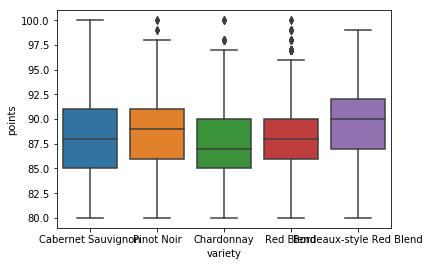

In [17]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
);

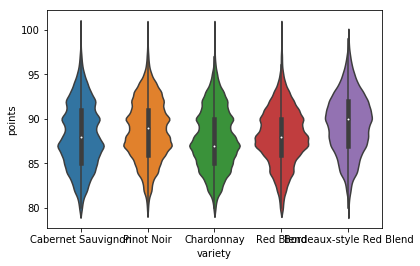

In [19]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
);

# Exercise

In [21]:
pokemon = pd.read_csv("Pokemon.csv", index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


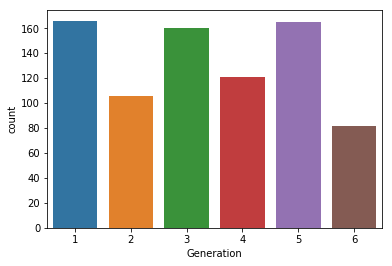

In [22]:
sns.countplot(pokemon['Generation']);

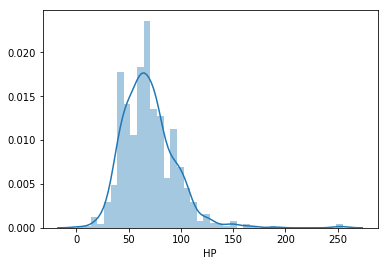

In [25]:
sns.distplot(pokemon['HP']);

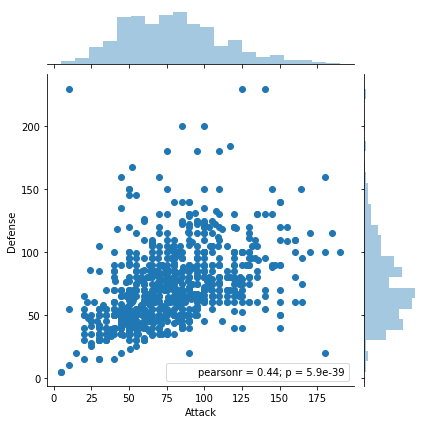

In [28]:
sns.jointplot(x='Attack', y='Defense', data=pokemon);

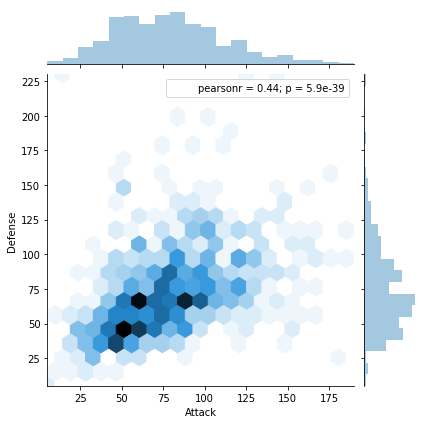

In [30]:
sns.jointplot(x='Attack', y='Defense', data=pokemon, kind='hex', gridsize=20);

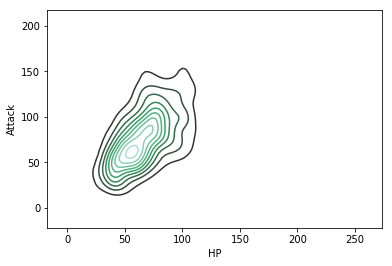

In [32]:
sns.kdeplot(pokemon['HP'], pokemon['Attack']);

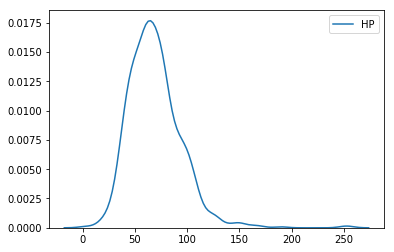

In [34]:
sns.kdeplot(pokemon['HP']);

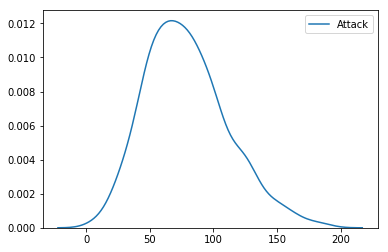

In [35]:
sns.kdeplot(pokemon['Attack']);

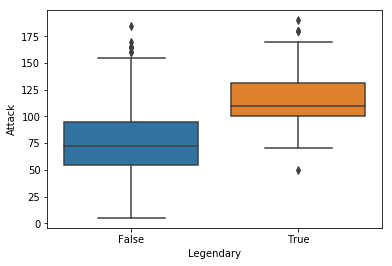

In [39]:
sns.boxplot(x='Legendary', y='Attack', data=pokemon);

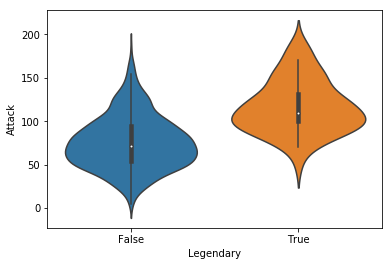

In [41]:
sns.violinplot(x='Legendary', y='Attack', data=pokemon);